# Préparation des donnée
    - un jeu de données avec les voies actuelles : 
    - un jeu de données avec les voies historique :
    - un jeu de données avec les voies suprimer :
    - un jeu de données ou on aligne les voies historiques avec les voies actuelles :
    - un jeu de données sur les thématiques normalisée :
    - un jeu de données avec les personnes / les autres : 

In [43]:
# Importing the libraries | Importation des librairies 
import pandas as pd
import numpy as np
import regex as r

In [44]:
# Importing the data | Importation des données
data_voies_lyon = pd.read_table("/workspaces/Lyon_urban_space/data_archives_municipales_lyon/voieslyon_v01.csv",sep=";",header=0)

# Jeu de données avec les voies actuelles :

In [48]:
# Inspect Element | Inspecter l'élément
# data_voies_lyon

In [46]:
# Create a new data set with the actual in places | Créer un nouveau jeux de données avec les voies de lyon actuelles
data_voies_lyon_actu = data_voies_lyon[data_voies_lyon['Validité'] == 'Actuelle']
print(len(data_voies_lyon_actu))
print(len(data_voies_lyon))

# Filtering the dataset to include only current streets in Lyon
data_voies_lyon_actu = data_voies_lyon[data_voies_lyon['Validité'] == 'Actuelle']

# FR
#Affichage du nombre de voies actuelles à Lyon
print(f"Nombre de voies actuelles à Lyon : {len(data_voies_lyon_actu)}")
# Affichage du nombre total de voies répertoriées dans le jeu de données original pour comparaison
print(f"Nombre total de voies répertoriées : {len(data_voies_lyon)}")


2155
4423
Nombre de voies actuelles à Lyon : 2155
Nombre total de voies répertoriées : 4423


In [49]:
data_voies_lyon_actu.to_csv('data_voies_lyon_actu.csv', index=False)

# Jeu de données avec les voies historique :

In [50]:
# Create a new data set with the historical places | Créer un nouveau jeux de données avec les voies de lyon historique
data_voies_lyon_hist = data_voies_lyon[data_voies_lyon['Validité'] == 'Historique']
print(len(data_voies_lyon_hist))
print(len(data_voies_lyon))

# Filtering the dataset to include only current streets in Lyon
data_voies_lyon_hist = data_voies_lyon[data_voies_lyon['Validité'] == 'Historique']

# FR
#Affichage du nombre de voies actuelles à Lyon
print(f"Nombre de voies historique à Lyon : {len(data_voies_lyon_hist)}")
# Affichage du nombre total de voies répertoriées dans le jeu de données original pour comparaison
print(f"Nombre total de voies répertoriées : {len(data_voies_lyon)}")

1671
4423
Nombre de voies historique à Lyon : 1671
Nombre total de voies répertoriées : 4423


In [51]:
#data_voies_lyon_hist

In [52]:
data_voies_lyon_hist.to_csv('data_voies_lyon_hist.csv', index=False)

# Jeu de données avec les voies supprimer :

In [53]:
# Create a new data set with the historical places | Créer un nouveau jeux de données avec les voies de lyon historique
data_voies_lyon_sup = data_voies_lyon[data_voies_lyon['Validité'] == 'Supprimée']
print(len(data_voies_lyon_sup))
print(len(data_voies_lyon))

# FR
#Affichage du nombre de voies actuelles à Lyon
print(f"Nombre de voies supprimée à Lyon : {len(data_voies_lyon_sup)}")
# Affichage du nombre total de voies répertoriées dans le jeu de données original pour comparaison
print(f"Nombre total de voies répertoriées : {len(data_voies_lyon)}")

552
4423
Nombre de voies supprimée à Lyon : 552
Nombre total de voies répertoriées : 4423


In [54]:
data_voies_lyon_sup.to_csv('data_voies_lyon_sup.csv', index=False)

### Conclusion des 3 nouveaux jeux de données 
    - data_voies_lyon_actu.csv
    - data_voies_lyon_hist.csv
    - data_voies_lyon_sup.csv

In [65]:
int_sup = (len(data_voies_lyon_sup))
int_hist = (len(data_voies_lyon_hist))
int_actu = (len(data_voies_lyon_actu))
int_all = (len(data_voies_lyon))

print(len(data_voies_lyon_sup))
print(len(data_voies_lyon_hist))
print(len(data_voies_lyon_actu))
print(len(data_voies_lyon))

552
1671
2155
4423


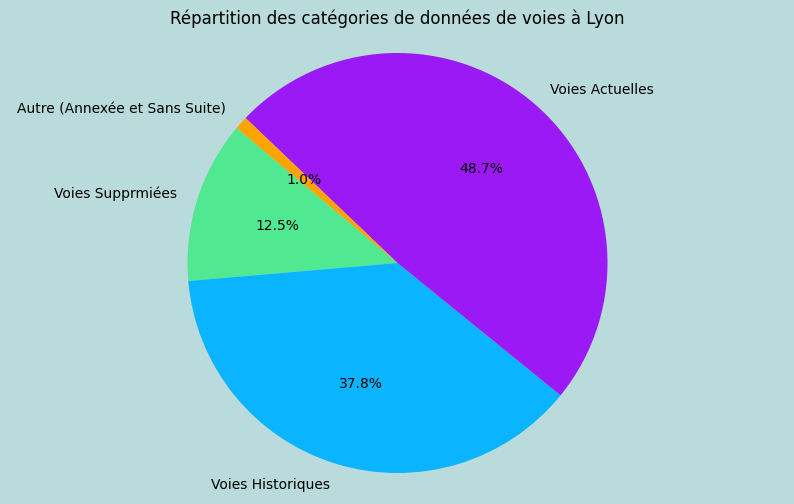

In [86]:
import matplotlib.pyplot as plt

# Calculating the count for "autre" category
int_autre = int_all - (int_actu + int_hist + int_sup)

# Labels for the sections
labels = ['Voies Supprmiées', 'Voies Historiques', 'Voies Actuelles', 'Autre (Annexée et Sans Suite)']

# Values for each section
sizes = [int_sup, int_hist, int_actu, int_autre]

# Setting color for each section
colors =  ["#50e991", "#0bb4ff", "#9b19f5", "#ffa300"]
#colors = ['#5D8AA8', '#7B68EE', '#6A5ACD', '#483D8B']



# Plotting the pie chart
plt.figure(figsize=(10, 6), facecolor='#badbdb')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca().set_facecolor('#badbdb')
plt.title('Répartition des catégories de données de voies à Lyon')
# Sauvegarde du graphique au format PNG
plt.savefig('vis_voies_lyon_validite_v01_.png', format='png')
# Sauvegarde du graphique au format JPEG
plt.savefig('vis_voies_lyon_validite_v01_.jpeg', format='jpeg')
plt.show()
